# Skaters (Season 2024/25) - Faceoff win rate

## Step 0: Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
from utils import df_utils, ftab_utils, pmf_utils, cdf_utils, modeling_distributions_utils, pdf_utils

## Step 1: Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [5]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [8]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


In [9]:
df = df_utils.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = df_utils.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Step 4: Variables and Filter

In [10]:
situation = "all"
feature1 = "faceoffsWon"
feature2 = "faceoffsLost"
feature_total = "faceoffsTotal"
feature = "faceoffs_win_rate"
min_faceoffs = 300
position = "C"
name_player="Auston Matthews"

A new feature with the faceoff win rate.

In [11]:
df_fo = df.copy()
df_fo[feature_total] = df_fo[feature1] + df_fo[feature2]
df_fo[feature] = df_fo[feature1] / df_fo[feature_total]

In [12]:
df_fo = df_fo[(df_fo["position"]==position) & (df_fo["situation"]==situation) & (df_fo[feature_total]>=min_faceoffs) ]
df_utils.print_df_size(df_fo)

Number of samples: 140
Number of features: 154


## Step 5: Summary statistics and Frequency Tables

In [13]:
res = df_fo.loc[lambda d: d[feature].idxmax()]
print(f"Center with the highest rate: {res["name"]} with {res[feature]:.2f}\t(Win: {int(res[feature1])}, Lost: {int(res[feature2])}).")

res = df_fo.loc[lambda d: d[feature].idxmin()]
print(f"Center with the lowest rate: {res["name"]} with {res[feature]:.2f}\t(Win: {int(res[feature1])}, Lost: {int(res[feature2])}).")

print(f"Mean: {df_fo[feature].mean():.2f}")
print(f"Variance: {df_fo[feature].var():.2f}")
print(f"Standard deviation: {df_fo[feature].std():.2f}")


Center with the highest rate: Jean-Gabriel Pageau with 0.60	(Win: 589, Lost: 399).
Center with the lowest rate: Fedor Svechkov with 0.37	(Win: 123, Lost: 212).
Mean: 0.50
Variance: 0.00
Standard deviation: 0.05


## Step 6: Probability Mass Function

## Step 7: Percentile Ranks and Cumulative Distribution Function

Reference player: **Auston Matthews**.

Auston Matthews - Percentile rank: 90.00
Median: 0.51
Interquartile range: 0.07
Quartile skewness: -0.02


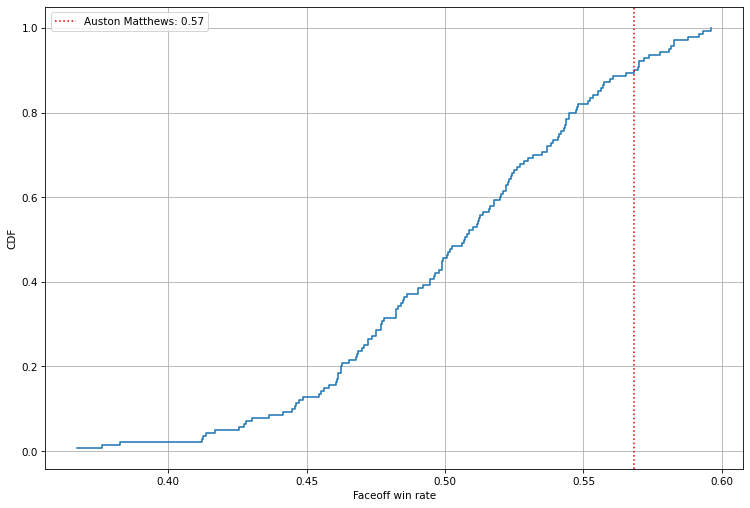

In [14]:
vals = df_fo[feature].values
ref = df_fo[df_fo["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Faceoff win rate")

## Step 8: Modeling Distributions

## Step 9: Probability Density Function and Kernel Density Estimate

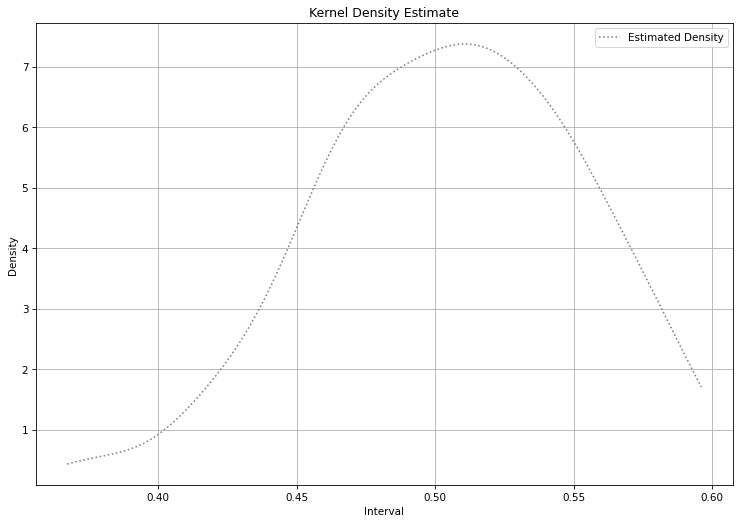

In [15]:
pdf_utils.plot_kde(df_fo, feature)

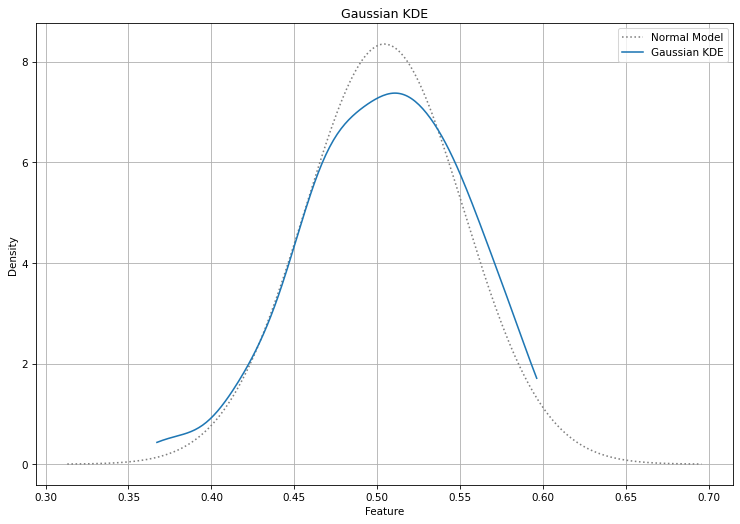

In [16]:
pdf_utils.plot_gaussian_kde(df_fo[feature])